In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/media/D/musor/reportsd.xls')
df.head(2)

,Номер,Ticket#,Возраст,Название,Дата создания,Время закрытия,Очередь,Состояние,ID клиента,Сервис,...,Источник,Причина отклонения,Оценка,Информационная система,Причина обращения,Имя Фамилия,Отдел/Отделение,Требуется выезд СА (уведомление директору),Текст обращения,TestText2
0,1,20231207100187,18 m,Заявка с портала: Не принимает купюры терминал №9,2023-12-07 14:08:46,NaN,Алматинский филиал Техподдержка,in progress,AF,10 ИТ-поддержка филиалов::10R_4 Платежные терм...,...,Portal,NaN,NaN,NaN,NaN,Радда Каюрова,_Отделения,NaN,NaN,NaN
1,2,20231207100186,18 m,AF_Kegen,2023-12-07 14:07:56,NaN,Алматинский филиал Техподдержка,in progress,HQ,10 ИТ-поддержка филиалов::10I_6 Связь и телефония,...,Phone,NaN,NaN,NaN,NaN,Нұрсолтан Шокенов,(0914) Отдел мониторинга,NaN,NaN,NaN


In [3]:
work = df[['Время закрытия','Агент (владелец)','Потраченное на заявку время']]

In [4]:
work.dropna(subset=['Время закрытия'], inplace=True)
work['Потраченное на заявку время'].fillna(0, inplace=True)

/tmp/ipykernel_15056/2091425229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work.dropna(subset=['Время закрытия'], inplace=True)
/tmp/ipykernel_15056/2091425229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work['Потраченное на заявку время'].fillna(0, inplace=True)


In [5]:
work

,Время закрытия,Агент (владелец),Потраченное на заявку время
3,2023-12-07 13:32:51,Александр Кириченко,240.0
11,2023-12-07 14:19:06,Жанболат Жеңісбек,60.0
13,2023-12-07 14:17:01,Жанболат Жеңісбек,60.0
14,2023-12-07 11:01:11,Александр Гурьев,30.0
17,2023-12-07 13:58:57,Ринал Чуканов,15.0
...,...,...,...
1554,2023-11-01 09:25:16,Айдын Джакашев,33.0
1555,2023-11-01 08:47:56,Александр Гурьев,25.0
1556,2023-11-01 08:47:28,Александр Гурьев,25.0
1557,2023-11-01 14:13:34,Александр Кириченко,61.0


In [6]:
work.isna().sum()

Время закрытия                 0
Агент (владелец)               0
Потраченное на заявку время    0
dtype: int64

In [8]:
work['Время закрытия'] = pd.to_datetime(df['Время закрытия'], errors='coerce')
work = work[work['Время закрытия'].dt.month == 11]

/tmp/ipykernel_15056/1583555886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work['Время закрытия'] = pd.to_datetime(df['Время закрытия'], errors='coerce')


In [9]:
work

,Время закрытия,Агент (владелец),Потраченное на заявку время
241,2023-11-30 18:06:39,Не назначена,120.0
243,2023-11-30 17:50:57,Владимир Демин,130.0
244,2023-11-30 17:48:26,Владимир Демин,5.0
245,2023-11-30 17:47:14,Владимир Демин,10.0
246,2023-11-30 16:23:18,Александр Гильдебранд,61.0
...,...,...,...
1554,2023-11-01 09:25:16,Айдын Джакашев,33.0
1555,2023-11-01 08:47:56,Александр Гурьев,25.0
1556,2023-11-01 08:47:28,Александр Гурьев,25.0
1557,2023-11-01 14:13:34,Александр Кириченко,61.0


In [10]:
df1 = pd.DataFrame(work['Агент (владелец)'].value_counts())
df2 = pd.DataFrame(work.groupby('Агент (владелец)')['Потраченное на заявку время'].sum() /60)
work2 = df1.join(df2)

In [11]:
work3 = work2.sort_values('Потраченное на заявку время')

In [12]:
work3

,count,Потраченное на заявку время
Агент (владелец),,
Даурен Забиев,12,0.016667
Ақерке Мәңгібаева,1,0.050000
Серик Карпанбаев,3,0.900000
Иван Швенглер,6,0.916667
Сергей Рябов,15,4.483333
Арман Жұбатыр,12,6.266667
Арман Буранов,12,7.016667
Абай Пирназаров,21,9.933333
Ярослав Латыпов,7,11.016667


<function matplotlib.pyplot.show(close=None, block=None)>

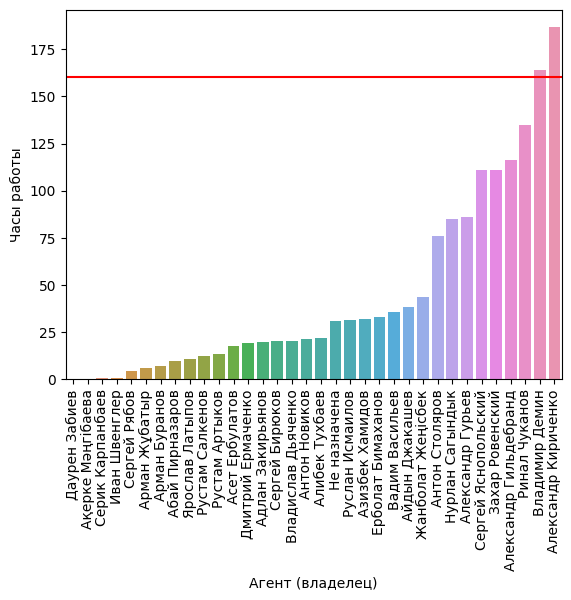

In [13]:

sns.barplot(x=work3.index, y='Потраченное на заявку время', data=work3)
plt.ylabel('Часы работы')
plt.xticks(rotation=90)
plt.axhline(y=160, color='red')
plt.show

In [14]:
work3_sort = work3.sort_values(by='count')

<function matplotlib.pyplot.show(close=None, block=None)>

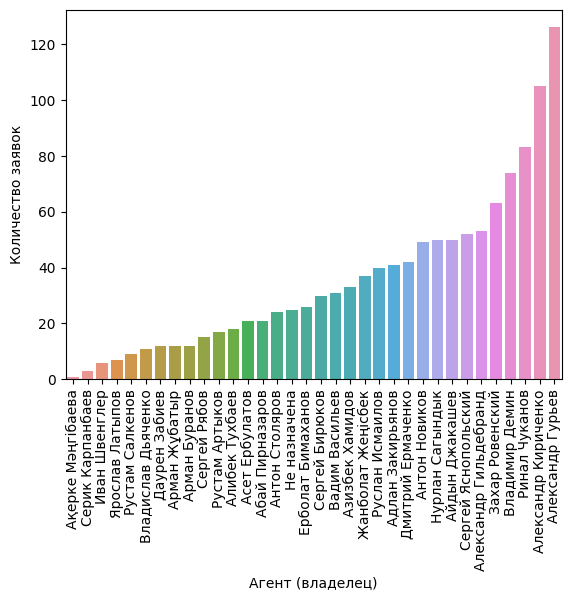

In [15]:
sns.barplot(x=work3_sort.index, y='count', data=work3_sort)
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
#plt.axhline(y=168, color='red')
plt.show

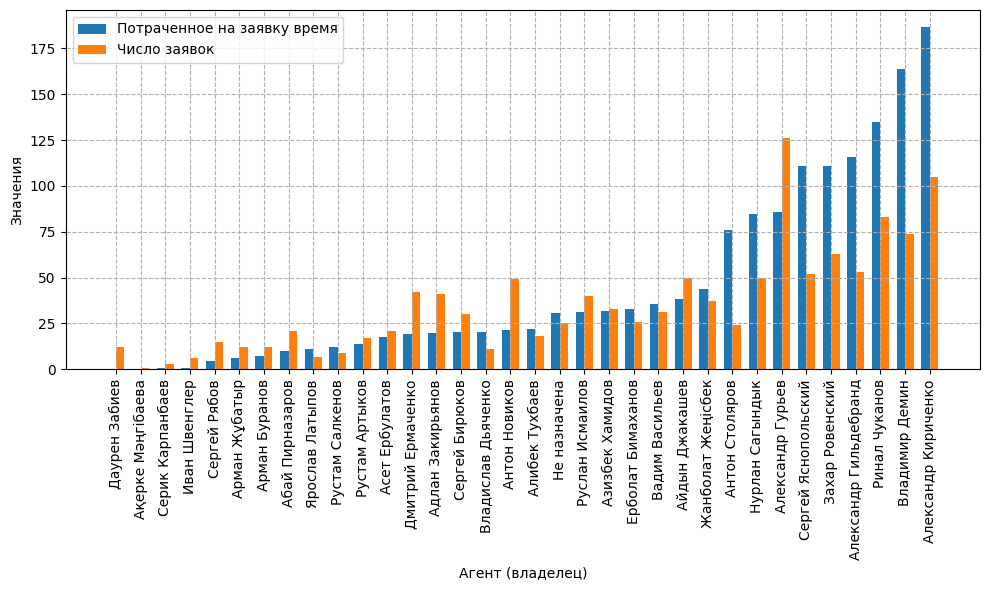

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(work3))
ax.bar(x, work3['Потраченное на заявку время'], width=bar_width, label='Потраченное на заявку время', color='tab:blue')
ax.bar([i + bar_width for i in x], work3['count'], width=bar_width, label='Число заявок', color='tab:orange')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(work3.index, rotation=90)
ax.legend()

# Задаем подписи для осей
ax.set_xlabel('Агент (владелец)')
ax.set_ylabel('Значения')

# Включаем сетку
ax.grid(True, linestyle='--')

# Отображаем график
plt.tight_layout()
plt.show()